In [12]:
#tensorflow homework 3

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

Training set size: (50000, 32, 32, 3)
Test set size: (10000, 32, 32, 3)
Each image size: (32, 32, 3)
Number of classes: 10
Sample labels: [[6]
 [9]
 [9]
 [4]
 [1]]
Train set distribution: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test set distribution: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


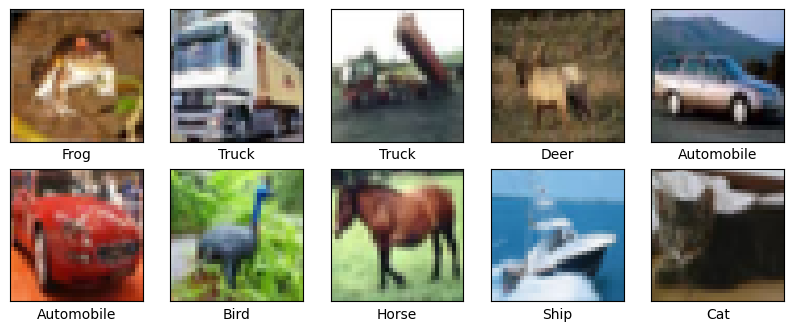

In [21]:
# 1.1 prepare the dataset

# Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Getting fammiliar with dataset
# Dataset size
print("Training set size:", train_images.shape)
print("Test set size:", test_images.shape)

# Image size and channels
print("Each image size:", train_images.shape[1:])

# Number of classes
num_classes = len(set(train_labels.flatten()))
print("Number of classes:", num_classes)

# Show first few labels
print("Sample labels:", train_labels[:5])

# number of images per class
unique, counts = np.unique(train_labels, return_counts=True)
print("Train set distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:", dict(zip(unique, counts)))

# visuallise a sample of dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Your existing plotting code here
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [15]:
# 1.2 Build the CNN Model
def build_model(input_shape, num_classes, conv_layers_config, dense_units, dropout_rate):
    input_tensor = Input(shape=input_shape)

    x = input_tensor
    for layer_conf in conv_layers_config:
        x = Conv2D(layer_conf['filters'], layer_conf['kernel_size'], activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    for units in dense_units:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    output_tensor = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output_tensor)
    return model

In [16]:
# 1.3 Training the Network
def train_model(model, train_images, train_labels, test_images, test_labels, epochs, optimizer):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history


In [17]:
# 1.4 Visualization
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

Epoch 1/15
1563/1563 [==============================] - 22s 7ms/step - loss: 1.7383 - accuracy: 0.3681 - val_loss: 1.3916 - val_accuracy: 0.5016
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3815 - accuracy: 0.5001 - val_loss: 1.1446 - val_accuracy: 0.6035
Epoch 3/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2004 - accuracy: 0.5766 - val_loss: 1.0957 - val_accuracy: 0.6099
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1007 - accuracy: 0.6127 - val_loss: 1.3970 - val_accuracy: 0.5414
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0173 - accuracy: 0.6472 - val_loss: 0.9678 - val_accuracy: 0.6686
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9405 - accuracy: 0.6722 - val_loss: 0.9197 - val_accuracy: 0.6887
Epoch 7/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8806 - accuracy: 0.6960 - val_loss: 0.9873 - val_acc

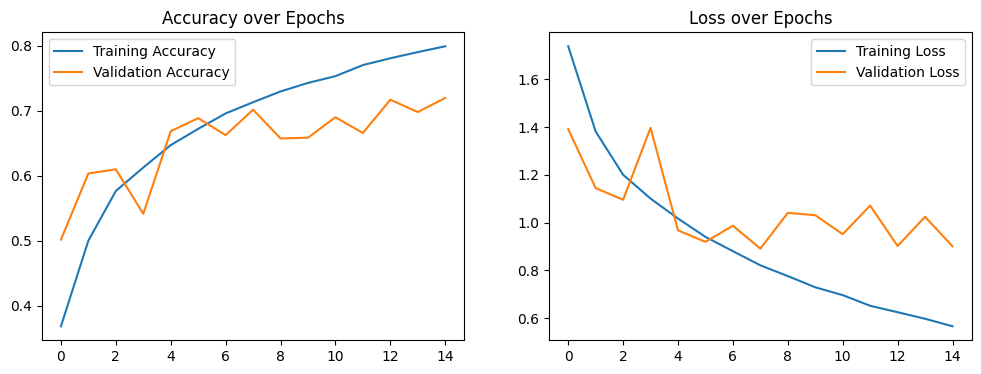

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7010 - accuracy: 0.3845 - val_loss: 1.5947 - val_accuracy: 0.4305
Epoch 2/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3889 - accuracy: 0.4999 - val_loss: 1.3849 - val_accuracy: 0.5098
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2378 - accuracy: 0.5587 - val_loss: 1.1846 - val_accuracy: 0.5857
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1344 - accuracy: 0.5972 - val_loss: 1.0701 - val_accuracy: 0.6114
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0577 - accuracy: 0.6263 - val_loss: 1.2691 - val_accuracy: 0.5626
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9936 - accuracy: 0.6474 - val_loss: 1.1975 - val_accuracy: 0.5882
Epoch 7/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9455 - accuracy: 0.6635 - val_loss: 0.9458 - val_accu

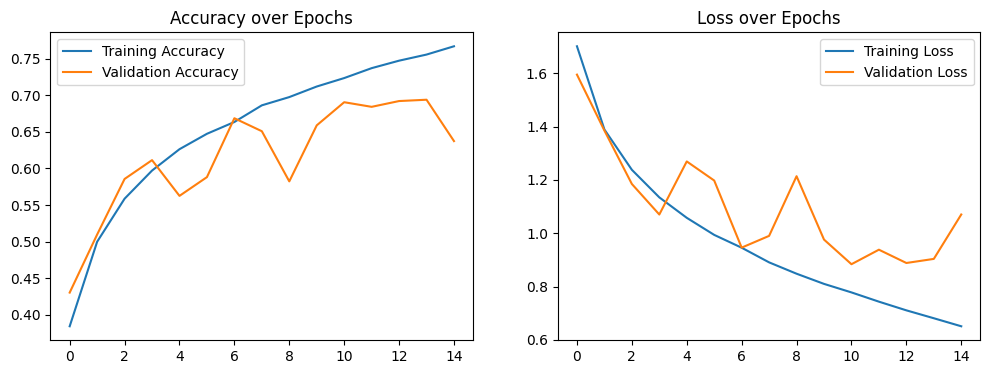

In [18]:
# Experimenting with Different Settings
# Model Configuration
input_shape = (32, 32, 3)
num_classes = 10
conv_layers_config = [{'filters': 32, 'kernel_size': (3, 3)}, {'filters': 64, 'kernel_size': (3, 3)}]
dense_units = [128]
dropout_rate = 0.5
epochs = 15

# Experiment 1: Using Adam optimizer
model = build_model(input_shape, num_classes, conv_layers_config, dense_units, dropout_rate)
history = train_model(model, train_images, train_labels, test_images, test_labels, epochs, 'adam')
plot_training_history(history)

# Experiment 2: Using SGD optimizer
model = build_model(input_shape, num_classes, conv_layers_config, dense_units, dropout_rate)
history = train_model(model, train_images, train_labels, test_images, test_labels, epochs, 'sgd')
plot_training_history(history)

# More experiments can be done by changing the conv_layers_config, dense_units, dropout_rate, and optimizer.


In [ ]:
# 2.1 Sharing Your Results
# eigh different experiment so far
# overfitting
# overall

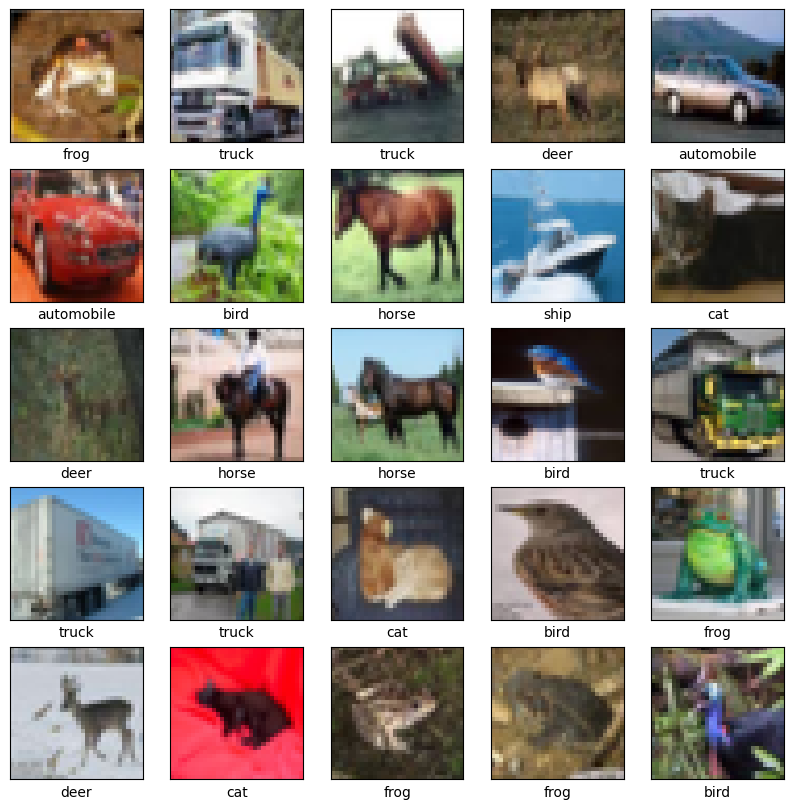

In [20]:
# 1 // Prepare the Dataset

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(ds_train, ds_test), ds_info = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info=True)

# Define batch size
BATCH_SIZE = 64
PREFETCH_SIZE = 2

# Preprocess the dataset
def data_pipeline(input):
    # Map the dataset to extract images and labels
    input =input.map(lambda image, label: (image, label))
    # Reshape each image to a flat vector
    input = input.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    # Normalize(Scale) image values to be in the range [-1, 1]
    input = input.map(lambda image, label: ((tf.cast(image, tf.float32) / 20255) - 1, label))
    # One-hot encode the labels
    input = input.map(lambda image, label: (image, tf.one_hot(label, depth=10)))
    # Decode one-hot labels and convert images to numpy arrays for visualization
    input = input.map(lambda image, label: (image, tf.argmax(label, axis=-1)))
    # Shuffle the dataset and create batches of size 4
    input = input.shuffle(1024).batch(BATCH_SIZE).prefetch(PREFETCH_SIZE)
    return input

# Save the datasets after applying the data pipeline
train_dataset = data_pipeline(ds_train)
test_dataset = data_pipeline(ds_test)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
